In [1]:
# import libraries
import numpy as np
import pandas as pd

# read in df
routes = pd.read_csv("Routes.csv", encoding = 'latin-1')
species = pd.read_csv("SpeciesList.csv")
wa_observes = pd.read_csv("Washing.csv")
weather = pd.read_csv("Weather.csv")

# filter to only WA (State num = 89)
wa_weather = weather[weather["StateNum"] == 89]

# filter to ranier (route 61) and bay view (route 66)
mt_ranier_weather = wa_weather[wa_weather["Route"] == 61].drop(["CountryNum", "StateNum", "Route"], axis = 1)
bay_view_weather = wa_weather[wa_weather["Route"] == 66]

In [2]:
# filter to only WA routes 
wa_routes = routes[routes["StateNum"] == 89]

# filter to ranier (route 61) and bay view (route 66)
mt_ranier = wa_observes[wa_observes["Route"] == 61] #mountain
bay_view = wa_observes[wa_observes["Route"] == 66] #waterfront

#  joins routes, species, and preliminary weather data (mt rainer)
mt_ranier_species_obs = pd.merge(mt_ranier, species, on = ["AOU", "AOU"])
mt_ranier_species_obs = pd.merge(mt_ranier_species_obs, mt_ranier_weather, on = ["RouteDataID", "RouteDataID"])
mt_ranier_species_obs = mt_ranier_species_obs[["Year_x", "English_Common_Name", "SpeciesTotal", "Month", "Day", "StartTemp", "EndTemp"]]

# calculate avg temp (mt rainer)
mt_ranier_species_obs["AvgTemp"] = (mt_ranier_species_obs["EndTemp"] + mt_ranier_species_obs["StartTemp"])/2
mt_ranier_species_obs = mt_ranier_species_obs.drop(["StartTemp", "EndTemp"], axis = 1)

# pick Sooty Goose species
print(mt_ranier_species_obs[mt_ranier_species_obs["English_Common_Name"] == "Sooty Grouse"] )

# join routes, species, and preliminary weather data (bay view)
bay_view_species_obs = pd.merge(bay_view, species, on = ["AOU", "AOU"])
bay_view_species_obs = pd.merge(bay_view_species_obs, bay_view_weather, on = ["RouteDataID", "RouteDataID"])
bay_view_species_obs = bay_view_species_obs[["Year_x", "English_Common_Name", "SpeciesTotal", "Month", "Day", "StartTemp", "EndTemp"]]

# calculate avg temp (bay view)
bay_view_species_obs["AvgTemp"] = (bay_view_species_obs["EndTemp"] + bay_view_species_obs["StartTemp"])/2
bay_view_species_obs = bay_view_species_obs.drop(["StartTemp", "EndTemp"], axis = 1)

# pick wilsons warbler
print(mt_ranier_species_obs[mt_ranier_species_obs["English_Common_Name"] == "Wilson's Warbler"] )

     Year_x English_Common_Name  SpeciesTotal  Month  Day  AvgTemp
32     1991        Sooty Grouse             6      6   27     49.5
109    1993        Sooty Grouse             5      6   24     47.5
146    1994        Sooty Grouse             6      6   13     48.5
228    1998        Sooty Grouse             1      6   19     51.0
260    1999        Sooty Grouse             4      6   27     53.5
299    2000        Sooty Grouse             2      6   17     60.0
338    2001        Sooty Grouse             4      6   18     53.0
400    2003        Sooty Grouse             5      6   15     54.0
467    2006        Sooty Grouse            11      6   14     62.5
497    2007        Sooty Grouse             2      6   21     65.0
538    2008        Sooty Grouse             6      6   19     42.5
572    2009        Sooty Grouse             2      6   19     50.5
605    2010        Sooty Grouse             4      6   23     49.5
636    2011        Sooty Grouse             4      6   21     

Mt Ranier AOU

Sooty Grouse (Watch - Decline), 2971

3930 4050 4130 4200 4240 4330 4590 4660 4780 4840 4860 4880 4980 5290
 5330 5540 5600 5671 5880 6130 6150 6190 6560 6650 6850 7221 7280 7480
 7580 7590 7610 7630 2971 4641 5140 6140 6270 6460 6680 6690 6800 7410
 7490 2630 4220 4930 5210 5850 6070 6320 6810 7170 2120 4680 4910 7010
 7260 7540 3690 4010 4690 5170 5810 7380 3720 5830 6520 6685 3120 3680
 4030 5150 4950 6450 3790 5960 4360

 Bay View

 Wilson's Warbler (Steep Decline)

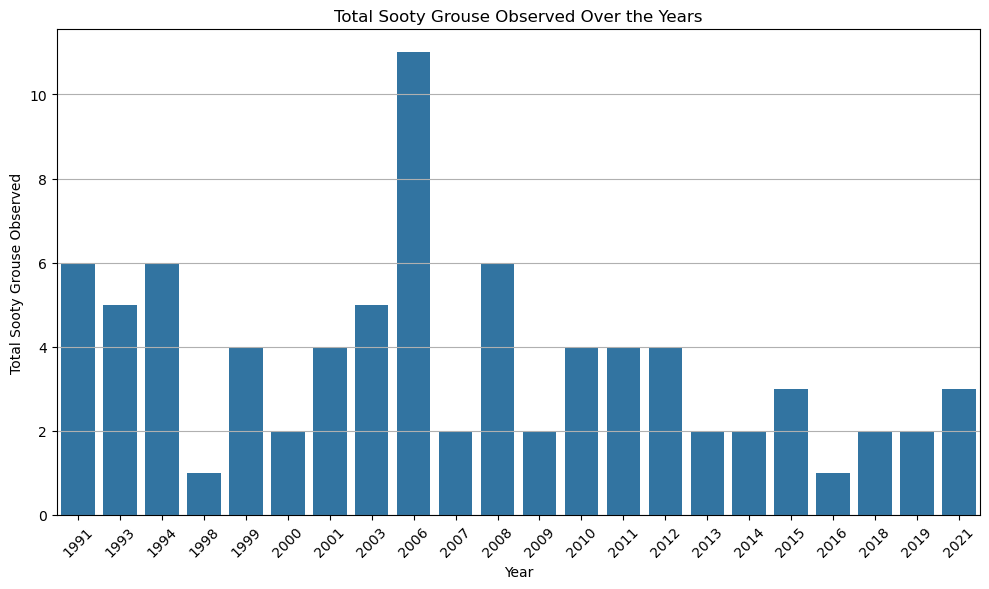

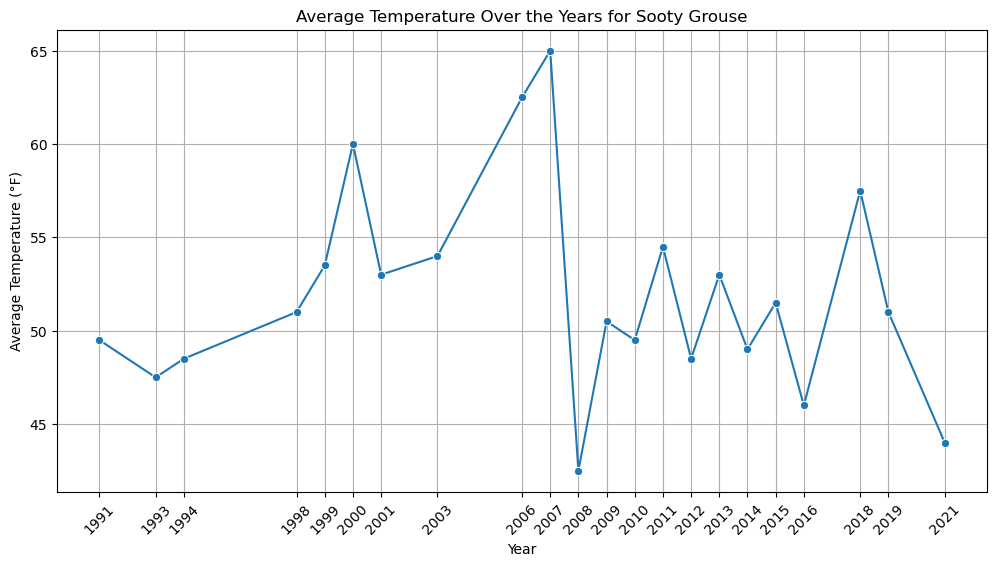

In [6]:
# df for sooty grouse
Sooty_Grouse = mt_ranier_species_obs[mt_ranier_species_obs["English_Common_Name"] == "Sooty Grouse"]

# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot for SpeciesTotal over the years
plt.figure(figsize=(10, 6))
sns.barplot(data=Sooty_Grouse, x='Year_x', y='SpeciesTotal')
plt.title('Total Sooty Grouse Observed Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Sooty Grouse Observed')
plt.xticks(rotation=45) 
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Create a line plot for AvgTemp over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=Sooty_Grouse, x='Year_x', y='AvgTemp', marker='o')
plt.title('Average Temperature Over the Years for Sooty Grouse')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°F)')
plt.xticks(Sooty_Grouse['Year_x'])
plt.tick_params(axis = 'x', rotation =45)
plt.grid()
plt.show()

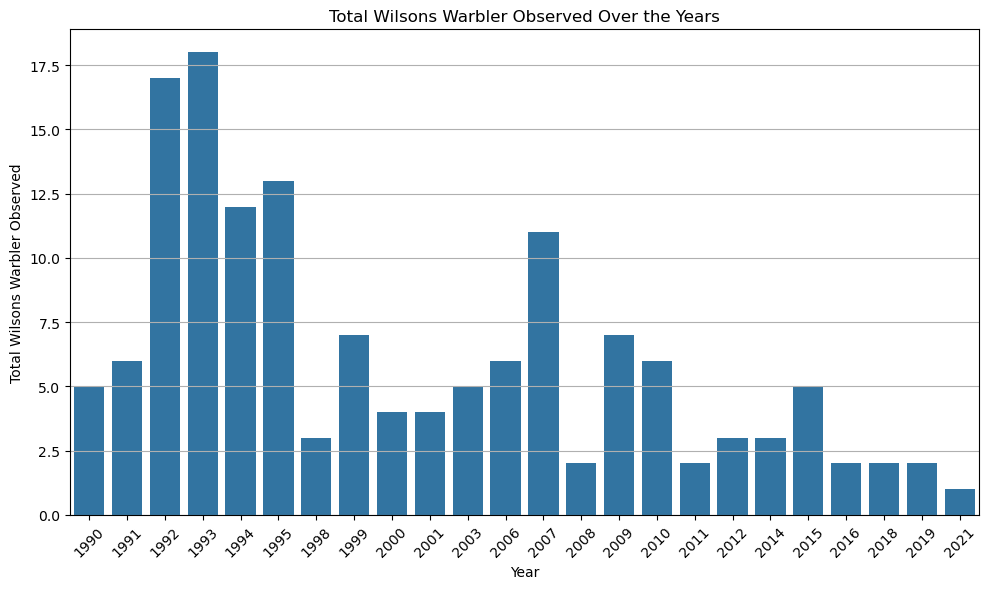

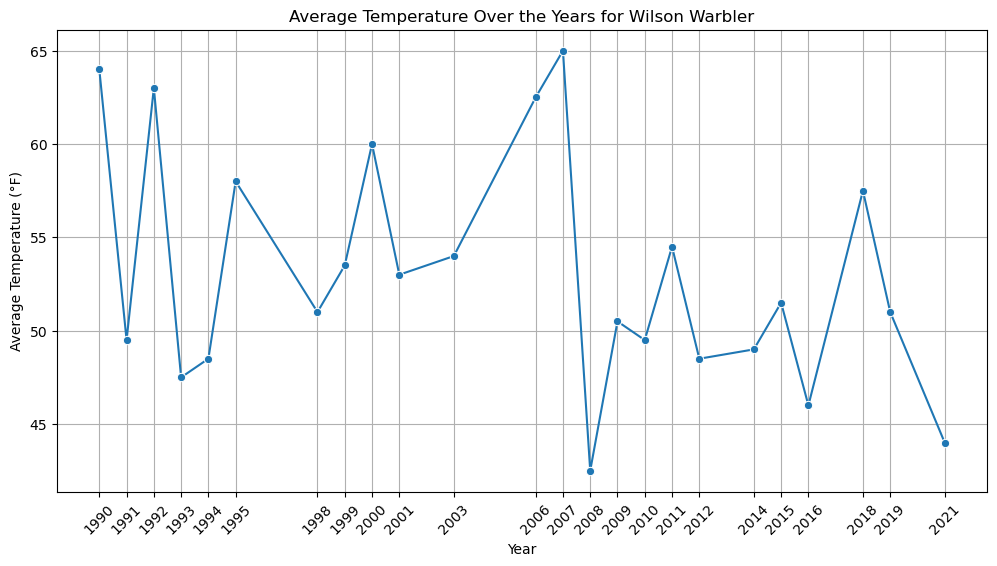

In [129]:
# df for sooty grouse
Wilsons_Warbler = mt_ranier_species_obs[mt_ranier_species_obs["English_Common_Name"] == "Wilson's Warbler"]

# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot for SpeciesTotal over the years
plt.figure(figsize=(10, 6))
sns.barplot(data=Wilsons_Warbler, x='Year_x', y='SpeciesTotal')
plt.title('Total Wilsons Warbler Observed Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Wilsons Warbler Observed')
plt.xticks(rotation=45) 
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Create a line plot for AvgTemp over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=Wilsons_Warbler, x='Year_x', y='AvgTemp', marker='o')
plt.title('Average Temperature Over the Years for Wilson Warbler')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°F)')
plt.xticks(Wilsons_Warbler['Year_x'])
plt.tick_params(axis = 'x', rotation =45)
plt.grid()
plt.show()

In [91]:
### Weather data
mtRainierWeather = pd.read_csv("MtRainierNOAATemp.csv")

# Merge Sooty Grouse and Weather
weather_mt = Sooty_Grouse.merge(mtRainierWeather, left_on="Year_x", right_on="DATE", how="inner")

# Select required columns and rename for clarity
weather_mt = weather_mt[["Year_x", "English_Common_Name", "SpeciesTotal", "AvgTemp", "TAVG", "TMAX", "TMIN"]]
weather_mt.rename(columns={"Year_x": "Year", "AvgTemp": "Observed_Temp"}, inplace=True)

# Display result
weather_mt.head()

# Mt Rainier Weather EDA
#print(weather_mt.isnull().sum())
#len(weather_mt)
weather_mt.head()

,Year,English_Common_Name,SpeciesTotal,Observed_Temp,TAVG,TMAX,TMIN
0,1991,Sooty Grouse,6,49.5,NaN,54.0,NaN
1,1993,Sooty Grouse,5,47.5,44.2,53.3,35.2
2,1994,Sooty Grouse,6,48.5,45.0,54.6,35.4
3,1998,Sooty Grouse,1,51.0,NaN,NaN,35.9
4,1999,Sooty Grouse,4,53.5,43.5,53.2,33.8


C:\Users\nnaga\AppData\Local\Temp\ipykernel_6508\74905461.py:7: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  weather_mt = weather_mt.set_index("Year").interpolate(method='linear').reset_index()


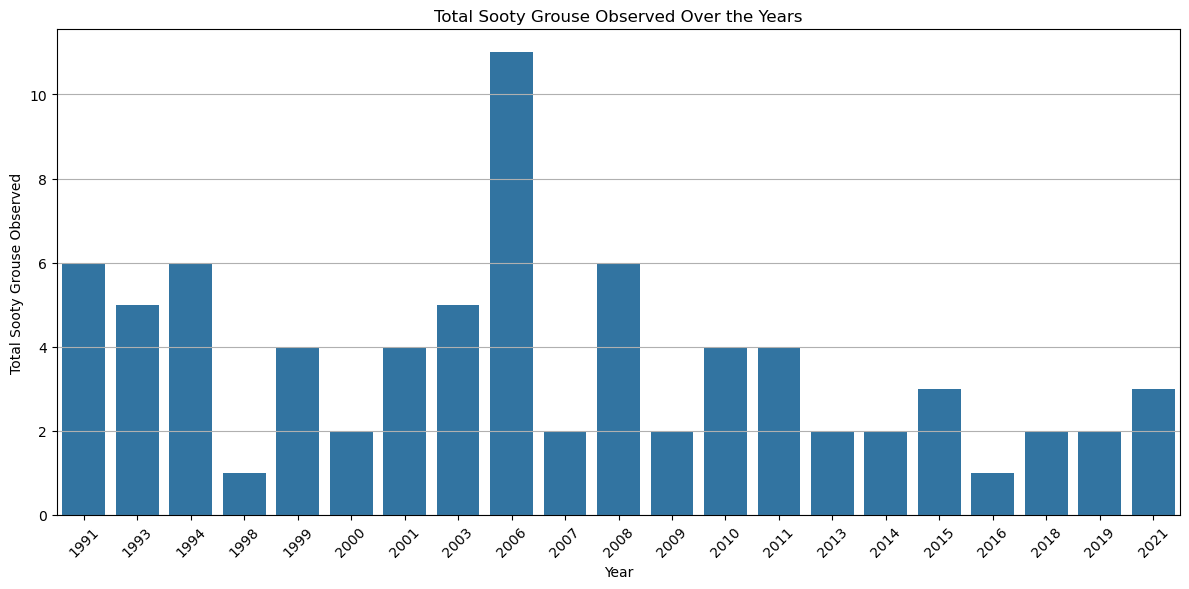

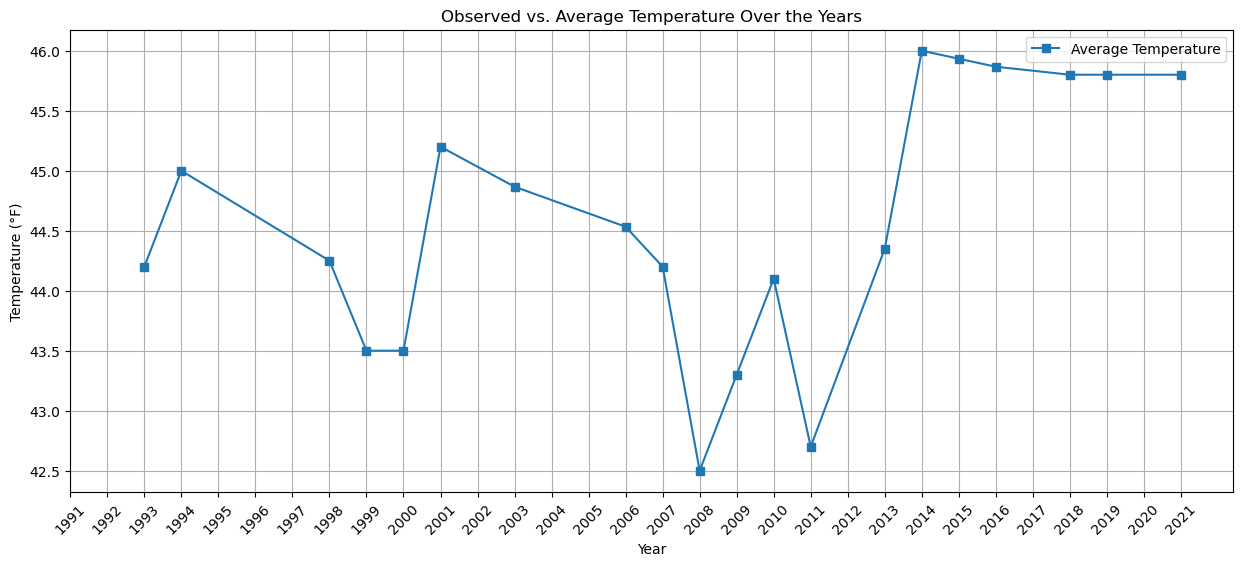

In [111]:
### Weather Data Viz

# data interpolation
weather_mt = weather_mt.sort_values(by="Year") # sort by year

# Interpolate missing values
weather_mt = weather_mt.set_index("Year").interpolate(method='linear').reset_index()


# Create a bar plot for SpeciesTotal over the years
plt.figure(figsize=(12, 6))
sns.barplot(data=weather_mt, x='Year', y='SpeciesTotal')
plt.title('Total Sooty Grouse Observed Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Sooty Grouse Observed')
plt.xticks(rotation=45) 
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Create a line plot for AvgTemp over the years
plt.figure(figsize=(15, 6))
#plt.plot(weather_mt["Year"], weather_mt["Observed_Temp"], marker='o', label="Observed Temperature")
plt.plot(weather_mt["Year"], weather_mt["TAVG"], marker='s', label="Average Temperature")
plt.xticks(range(1991,2022))
plt.xticks(rotation=45) 

# Labels and title
plt.xlabel("Year")
plt.ylabel("Temperature (°F)")
plt.title("Observed vs. Average Temperature Over the Years")
plt.legend()
plt.grid()
plt.show()

Mean Squared Error: 2.7359358164460197
R-squared: -0.09437432657840783


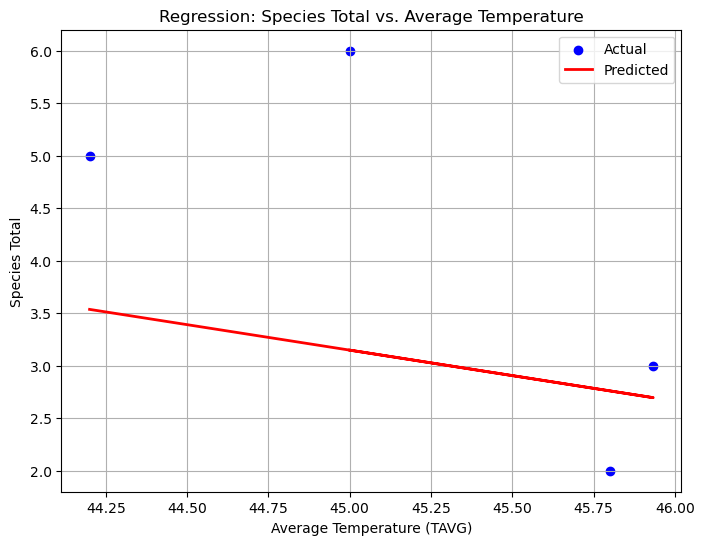

In [113]:
### Simple Regression: predicting species total using tavg

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Drop rows where 'TAVG' or 'SpeciesTotal' are missing
weather_mt = weather_mt.dropna(subset=['TAVG', 'SpeciesTotal'])

# Define the feature and target
X = weather_mt[['TAVG']]  # Feature (average temperature)
y = weather_mt['SpeciesTotal']  # Target (species total)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict using the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
    # negative r-squared value shows that TAVG has a weak relationship with SpeciesTotal

# Plotting the results
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted', linewidth=2)
plt.xlabel('Average Temperature (TAVG)')
plt.ylabel('Species Total')
plt.title('Regression: Species Total vs. Average Temperature')
plt.legend()
plt.grid(True)
plt.show()

In [115]:
### Linear regression: TMIN, TMAX, TAVG, interactions with YEAR to predict SpeciesTotal

# Step 1: Prepare the data
weather_mt = weather_mt.dropna(subset=["TMAX", "TMIN", "TAVG", "Year", "SpeciesTotal"])

# Add interaction terms with Year
weather_mt['Year_TMAX'] = weather_mt['Year'] * weather_mt['TMAX']
weather_mt['Year_TMIN'] = weather_mt['Year'] * weather_mt['TMIN']
weather_mt['Year_TAVG'] = weather_mt['Year'] * weather_mt['TAVG']

# Step 2: Define the features and target
X = weather_mt[['TMAX', 'TMIN', 'TAVG', 'Year', 'Year_TMAX', 'Year_TMIN', 'Year_TAVG']]
y = weather_mt['SpeciesTotal']

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Create and fit the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Predict and evaluate the model
y_pred = model.predict(X_test)

# Calculate MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Step 6: Output results
print("Mean Squared Error:", mse)
    # lower mse than previous regression -> much closer predictions than simple regression
    # model does a decent job at predicing species total 
print("R-squared:", r2)
    # 61% of varaince in SpeciesTotal is explained by the model

# Print coefficients for each feature
print("\nCoefficients:")
coefficients = pd.DataFrame(model.coef_, X.columns, columns=["Coefficient"])
print(coefficients)
    # TMIX plays a significant role in determining species total

Mean Squared Error: 0.9716848365753638
R-squared: 0.6113260653698545

Coefficients:
           Coefficient
TMAX        482.651846
TMIN        798.393385
TAVG       -962.439437
Year          5.631363
Year_TMAX    -0.242263
Year_TMIN    -0.400972
Year_TAVG     0.484707
